<a href="https://colab.research.google.com/github/HvTung04/uetDataScience_course/blob/main/mid_term_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, StratifiedKFold
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score, f1_score, make_scorer
from xgboost import XGBClassifier

In [2]:
# Read in data
df = pd.read_csv('7.csv')

In [98]:
len(df)

100

#Đọc qua dữ liệu

In [3]:
df.head()

,Names,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,Performance impact,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Health rating
0,Ali,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Agree,During Exams,Yes,Camera,Yes,Accounting,Headache,Never,Using Blue light filter,Excellent
1,Bilal,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Neutral,During Exams,Yes,Notes Taking App,Yes,Browsing Material,All of these,Sometimes,Taking Break during prolonged use,Good
2,Hammad,21-25,Male,Yes,IOS,Sometimes,All of these,Yes,Educational Videos,4-6 hours,Strongly agree,Not Distracting,No,Camera,Yes,Browsing Material,All of these,Sometimes,None of Above,Excellent
3,Abdullah,21-25,Male,Yes,Android,Frequently,All of these,Yes,Educational Videos,2-4 hours,Strongly agree,During Class Lectures,No,Internet Access,Only Partially,Reasarch,NaN,Never,Limiting Screen Time,Excellent
4,Waqar,21-25,Male,Yes,IOS,Frequently,All of these,Yes,Educational Videos,> 6 hours,Agree,While Studying,Yes,Internet Access,No,Browsing Material,Sleep disturbance,Sometimes,None of Above,Excellent


In [4]:
# Problem's label
df['Health rating'].value_counts()

Health rating
Good                        42
Excellent                   34
Fair                        13
Excellent;Good               5
Good;Fair                    2
Poor                         2
Excellent;Good;Fair;Poor     1
Name: count, dtype: int64

In [5]:
df[df['Health rating'] == 'Excellent;Good;Fair;Poor']

,Names,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,Performance impact,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Health rating
92,Iftikhar,21-25,Male,Yes,Android,Sometimes,All of these,No,Language,> 6 hours,Neutral,During Exams,Yes,Calculator,No,Browsing Material,Sleep disturbance,Rarely,Limiting Screen Time,Excellent;Good;Fair;Poor


In [6]:
df.describe()

,Names,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,Performance impact,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Health rating
count,100,100,100,100,100,98,99,98,98,99,98,98,99,98,98,99,98,99,99,99
unique,100,4,2,1,2,4,7,2,4,4,5,4,2,4,3,3,6,4,4,7
top,Ali,21-25,Male,Yes,Android,Sometimes,All of these,Yes,Educational Videos,4-6 hours,Agree,While Studying,Yes,Internet Access,Yes,Reasarch,All of these,Sometimes,Limiting Screen Time,Good
freq,1,72,81,100,81,53,59,94,54,40,40,34,70,70,57,48,32,52,35,42


=> Có dữ liệu trùng lặp, missing


**Một số biểu đồ thông tin về dữ liệu**

In [141]:
original_df = pd.read_csv('7.csv')

In [ ]:
for column in original_df.drop('Names', axis=1).columns:
  plt.figure(figsize=(10,6))
  sns.countplot(x=df[column])
  plt.title(f"Countplot of {column}")
  plt.xticks(rotation=45, ha='right')
  plt.show()

Những người có sức khỏe tuyệt vời theo từng độ tuổi

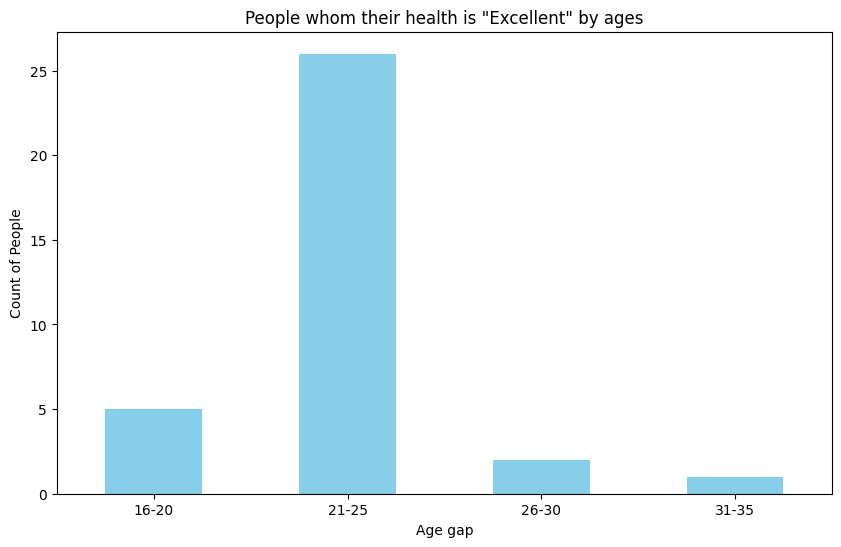

In [145]:
poor_health = df[df['Health rating'] == 'Excellent']

age_health_count = poor_health['Age'].value_counts().sort_index()

# Grafiği oluştur
plt.figure(figsize=(10, 6))
age_health_count.plot(kind='bar', color='skyblue')
plt.title('People whom their health is "Excellent" by ages')
plt.xlabel('Age gap')
plt.ylabel('Count of People')
plt.xticks(rotation=0)
plt.show()

Ảnh hưởng tới hiệu suất học tập của thời gian sử dụng hàng ngày

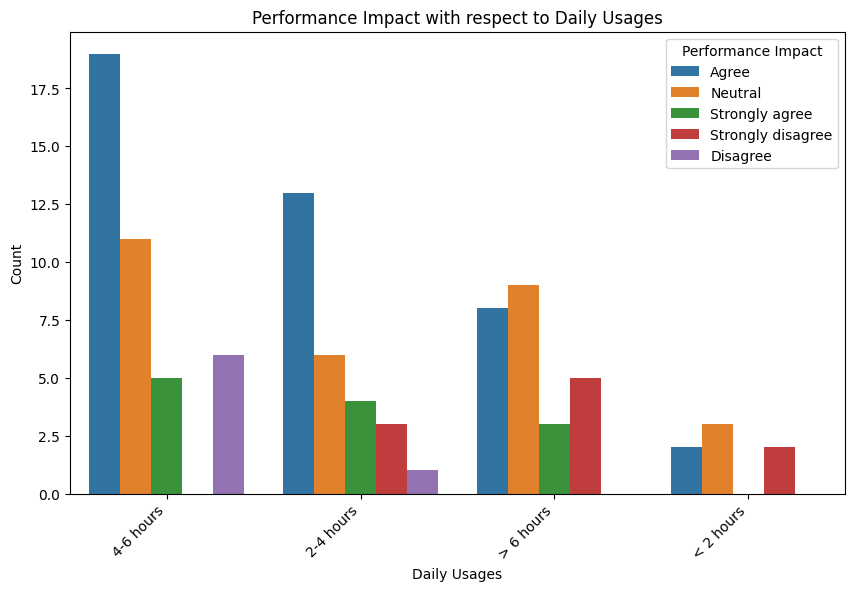

In [146]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Daily usages', hue='Performance impact', data=df)
plt.title('Performance Impact with respect to Daily Usages')
plt.xlabel('Daily Usages')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Performance Impact', loc='upper right')
plt.show()

# Tiền xử lý dữ liệu

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Names                           100 non-null    object
 1   Age                             100 non-null    object
 2   Gender                          100 non-null    object
 3   Mobile Phone                    100 non-null    object
 4   Mobile Operating System         100 non-null    object
 5   Mobile phone use for education  98 non-null     object
 6   Mobile phone activities         99 non-null     object
 7   Helpful for studying            98 non-null     object
 8   Educational Apps                98 non-null     object
 9   Daily usages                    99 non-null     object
 10  Performance impact              98 non-null     object
 11  Usage distraction               98 non-null     object
 12  Attention span                  99 non-null     obj

=> Tất cả các dữ liệu đều ở dạng object = Categorical

Tìm missing value

In [7]:
df.isna().sum()

Names                             0
Age                               0
Gender                            0
Mobile Phone                      0
Mobile Operating System           0
Mobile phone use for education    2
Mobile phone activities           1
Helpful for studying              2
Educational Apps                  2
Daily usages                      1
Performance impact                2
Usage distraction                 2
Attention span                    1
Useful features                   2
Health Risks                      2
Beneficial subject                1
Usage symptoms                    2
Symptom frequency                 1
Health precautions                1
Health rating                     1
dtype: int64

In [8]:
df[df.isna().any(axis=1)]

,Names,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,Performance impact,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Health rating
3,Abdullah,21-25,Male,Yes,Android,Frequently,All of these,Yes,Educational Videos,2-4 hours,Strongly agree,During Class Lectures,No,Internet Access,Only Partially,Reasarch,NaN,Never,Limiting Screen Time,Excellent
48,Mehvish,21-25,Female,Yes,Android,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,Fahad,26-30,Male,Yes,Android,Frequently,All of these,Yes,Study Planner,4-6 hours,Agree,During Class Lectures,Yes,Internet Access,NaN,Accounting,Sleep disturbance,Sometimes,Using Blue light filter,Excellent
63,Afsar,26-30,Male,Yes,Android,NaN,Social Media,Yes,Language,< 2 hours,Agree,While Studying,No,Camera,No,Accounting,All of these,Never,Using Blue light filter,Good
68,Haseem,26-30,Male,Yes,Android,NaN,Social Media,Yes,Study Planner,> 6 hours,Neutral,Not Distracting,Yes,Internet Access,Only Partially,Browsing Material,Sleep disturbance,Never,Using Blue light filter,Excellent
72,Jamshid,31-35,Male,Yes,Android,Rarely,Web-browsing,Yes,Language,2-4 hours,NaN,During Exams,Yes,Notes Taking App,No,Accounting,Sleep disturbance,Rarely,Taking Break during prolonged use,Fair
78,Mahmood,21-25,Male,Yes,Android,Rarely,Social Media;Web-browsing;Messaging;All of these,Yes,NaN,< 2 hours,Neutral,NaN,Yes,Internet Access,Yes,Reasarch,Headache,Never,Using Blue light filter,Excellent
82,Rafia,16-20,Female,Yes,Android,Sometimes,Messaging,Yes,Educational Videos,2-4 hours,Neutral,While Studying,No,NaN,Only Partially,Accounting,Anxiety or Stress,Rarely,Limiting Screen Time,Poor
88,Sayed,31-35,Male,Yes,Android,Rarely,Messaging,NaN,Productivity Tools,> 6 hours,Strongly disagree,Not Distracting,Yes,Notes Taking App,No,Accounting,All of these,Frequently,Using Blue light filter,Fair


Xử lý missing value bằng cách điền các giá trị xuất hiện thường xuyên nhất.

In [10]:
for column in df.columns:
  df[column].fillna(df[column].mode()[0], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Names                           100 non-null    object
 1   Age                             100 non-null    object
 2   Gender                          100 non-null    object
 3   Mobile Phone                    100 non-null    object
 4   Mobile Operating System         100 non-null    object
 5   Mobile phone use for education  100 non-null    object
 6   Mobile phone activities         100 non-null    object
 7   Helpful for studying            100 non-null    object
 8   Educational Apps                100 non-null    object
 9   Daily usages                    100 non-null    object
 10  Performance impact              100 non-null    object
 11  Usage distraction               100 non-null    object
 12  Attention span                  100 non-null    obj

Tìm hiểu các thuộc tính



In [19]:
for column in df.columns:
  print(f'{column}: {df[column].unique()}')

Names: ['Ali' 'Bilal' 'Hammad' 'Abdullah' 'Waqar' 'Aammar' 'Fatima' 'Jehanzaib'
 'Shafiq' 'Mubashir' 'Asad' 'Wasid' 'Waqas' 'Aqsa' 'Saleem' 'Farhan'
 'Zeeshan' 'Mukhtar' 'Rabia' 'Maryam' 'Irfan' 'Mudassar' 'Shahzad'
 'Hasinain' 'Samia' 'Hassan' 'Hamayhoon' 'Abid' 'Fasial' 'Yaqoob' 'Sakina'
 'Sania' 'Mursaleen' 'Sohail' 'Qadir' 'Khawir' 'Tariq' 'Shakir' 'Nafees'
 'Assraa' 'Saman' 'Farouk' 'Haroon' 'Ahmed' 'Hashim' 'Saad' 'Ameer'
 'Mishba' 'Mehvish' 'Maria' 'Ghazala' 'Amir' 'Irsh' 'Abrar' 'Ramzan'
 'Sultan' 'Kausar' 'Sabir' 'Sajid' 'Humara' 'Aryan' 'Fahad' 'Mahoob'
 'Afsar' 'Tufail' 'Asfar' 'Ibhraim' 'Jinnah' 'Haseem' 'Usman' 'Qasim'
 'Jawed' 'Jamshid' 'Nazir' 'Shabir' 'Bashir' 'Rehan' 'Fayaz' 'Mahmood'
 'Khurram' 'Zulfiqar' 'Amina' 'Rafia' 'Javid' 'Arslan' 'Malik' 'Ahsan'
 'Bhatti' 'Sayed' 'Tahir' 'Qasir' 'Abbas' 'Iftikhar' 'Ehman' 'Imran'
 'Zahoor' 'Hafeez' 'Babar' 'Rizwan' 'Lubna']
Age: ['21-25' '16-20' '26-30' '31-35']
Gender : ['Male' 'Female']
Mobile Phone : ['Yes']
Mobile Operatin

Vấn đề:
- Tất cả các thuộc tính đều là categorical.
- Một số điểm dữ liệu có nhiều giá trị cho một thuộc tính.
=> One hot encoding để thuận tiện xử lý

In [21]:
def multi_value_column_to_binary(df, column_name):
    # Get all unique values
    all_values = set()
    for values in df[column_name].dropna():
        all_values.update(values.split(';'))

    # Create binary columns
    for value in all_values:
        df[f"{column_name}_{value}"] = df[column_name].apply(lambda x: 1 if pd.notnull(x) and value in x.split(';') else 0)

    return df

# Handle multi-value columns
multi_value_columns = ['Mobile phone activities', 'Usage symptoms', 'Health rating']
for column in multi_value_columns:
    df = multi_value_column_to_binary(df, column)

In [27]:
# Encode other categorical variables
onehot = OneHotEncoder(sparse=False, handle_unknown='ignore')
cat_cols = ['Gender ', 'Mobile Operating System ']
onehot_cols = onehot.fit_transform(df[cat_cols])
onehot_feature_names = [f"{col}_{val}" for col, vals in zip(cat_cols, onehot.categories_) for val in vals]
onehot_df = pd.DataFrame(onehot_cols, columns=onehot_feature_names, index=df.index)
df = pd.concat([df, onehot_df], axis=1)

# Convert ordinal variables
age_map = {'16-20': 1, '21-25': 2, '26-30': 3, '31-35': 4}
df['Age_numeric'] = df['Age'].map(age_map)

usage_map = {'< 2 hours': 1, '2-4 hours': 2, '4-6 hours': 3, '> 6 hours': 4}
df['Daily_usage_numeric'] = df['Daily usages'].map(usage_map)

impact_map = {'Strongly disagree': 1, 'Disagree': 2, 'Neutral': 3, 'Agree': 4, 'Strongly agree': 5}
df['Performance_impact_numeric'] = df['Performance impact'].map(impact_map)

freq_map = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Frequently': 3}
df['Symptom_frequency_numeric'] = df['Symptom frequency'].map(freq_map)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
# Normalize numerical features
scaler = StandardScaler()
numeric_cols = ['Age_numeric', 'Daily_usage_numeric', 'Performance_impact_numeric', 'Symptom_frequency_numeric']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [29]:
df.head() # Data after normalize

,Names,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,...,Health rating_Fair,Health rating_Excellent,Gender _Female,Gender _Male,Mobile Operating System _Android,Mobile Operating System _IOS,Age_numeric,Daily_usage_numeric,Performance_impact_numeric,Symptom_frequency_numeric
0,Ali,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,...,0,1,0.0,1.0,1.0,0.0,-0.045798,0.181818,0.552744,-1.756819
1,Bilal,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,...,0,0,0.0,1.0,1.0,0.0,-0.045798,0.181818,-0.353394,0.524764
2,Hammad,21-25,Male,Yes,IOS,Sometimes,All of these,Yes,Educational Videos,4-6 hours,...,0,1,0.0,1.0,0.0,1.0,-0.045798,0.181818,1.458882,0.524764
3,Abdullah,21-25,Male,Yes,Android,Frequently,All of these,Yes,Educational Videos,2-4 hours,...,0,1,0.0,1.0,1.0,0.0,-0.045798,-0.954545,1.458882,-1.756819
4,Waqar,21-25,Male,Yes,IOS,Frequently,All of these,Yes,Educational Videos,> 6 hours,...,0,1,0.0,1.0,0.0,1.0,-0.045798,1.318182,0.552744,0.524764


# Feature Selection

Ở bước này sử dụng 2 cách tiếp cận để chọn lọc thuộc tính:
- Correlation Analysis: độ tương quan giữa các feature với target feature.
- Feature Importance: sử dụng các mô hình đơn giản để hiểu qua về độ quan trọng của các feature.

**Xét độ tương quan** \
Ta cần tách giữa các target variables và các features của chúng ta trong dataset, lựa chọn các cột đã được encode. Vì target variables (Health rating) có thể nhận nhiều giá trị cùng một lúc nên chúng ta tạo một cột target chính là max của target variables để xét độ tương quan với các features.

In [33]:
# Select encoded columns only
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Separate features and target
target_columns = [col for col in numeric_columns if col.startswith('Health rating_')]
feature_columns = [col for col in numeric_columns if col not in target_columns]

features = df[feature_columns]
target = df[target_columns]

# We'll use the highest health rating as the target
target['Health_rating_max'] = target.idxmax(axis=1).map({'Health rating_Poor': 0, 'Health rating_Fair': 1, 'Health rating_Good': 2, 'Health rating_Excellent': 3})

print("Features shape:", features.shape)
print("Target shape:", target['Health_rating_max'].shape)

# Correlation analysis
correlation = features.corrwith(target['Health_rating_max'])
correlation = correlation.abs().sort_values(ascending=False)

print("\nTop 10 correlated features:")
correlation.head(10)

Features shape: (100, 16)
Target shape: (100,)

Top 10 correlated features:


<ipython-input-33-3eecff146e19>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Health_rating_max'] = target.idxmax(axis=1).map({'Health rating_Poor': 0, 'Health rating_Fair': 1, 'Health rating_Good': 2, 'Health rating_Excellent': 3})


Gender _Female                          0.333299
Gender _Male                            0.333299
Symptom_frequency_numeric               0.213522
Usage symptoms_Headache                 0.198923
Usage symptoms_Sleep disturbance        0.133464
Usage symptoms_Anxiety or Stress        0.125453
Mobile phone activities_Messaging       0.112427
Performance_impact_numeric              0.110061
Usage symptoms_All of these             0.104366
Mobile phone activities_Social Media    0.091062
dtype: float64

In [37]:
correlation_matrix = pd.concat([features, target], axis=1).corr()

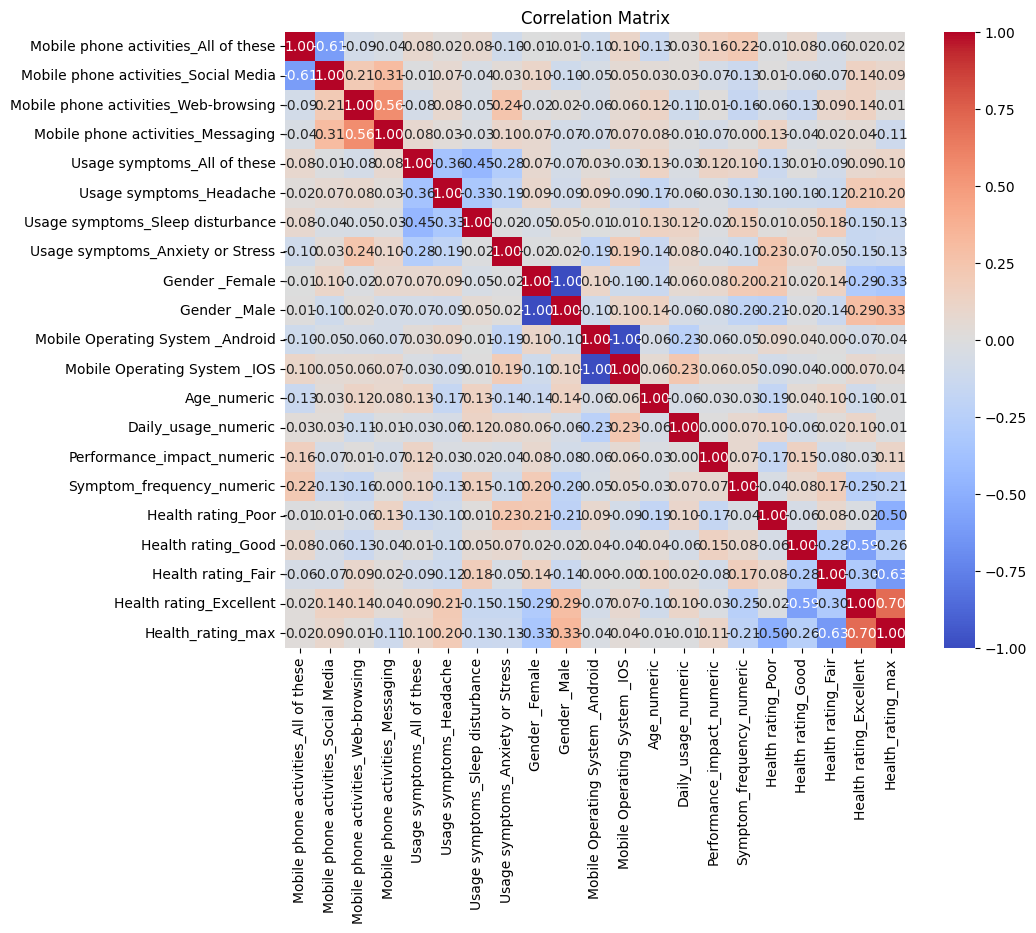

In [38]:
# Create heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Mutual Information**\
Một thước đo khác cho sự phụ thuộc lẫn nhau giữa 2 biến.

In [34]:
# Mutual Information
mi_scores = mutual_info_classif(features, target['Health_rating_max'])
mi_scores = pd.Series(mi_scores, name="MI Scores", index=features.columns)
mi_scores = mi_scores.sort_values(ascending=False)

print("\nTop 10 features by Mutual Information:")
mi_scores.head(10)


Top 10 features by Mutual Information:


Symptom_frequency_numeric               0.147645
Mobile phone activities_All of these    0.137713
Mobile Operating System _Android        0.095172
Daily_usage_numeric                     0.072244
Performance_impact_numeric              0.033609
Gender _Female                          0.033343
Gender _Male                            0.021473
Mobile Operating System _IOS            0.021093
Mobile phone activities_Social Media    0.000000
Mobile phone activities_Web-browsing    0.000000
Name: MI Scores, dtype: float64

**Random Forest cho Feature Importance**

In [35]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(features, target['Health rating_Excellent'])
importances = pd.Series(rf.feature_importances_, index=features.columns).sort_values(ascending=False)

print("\nTop 10 features by Random Forest Importance:")
importances.head(10)


Top 10 features by Random Forest Importance:


Symptom_frequency_numeric               0.152113
Performance_impact_numeric              0.142347
Daily_usage_numeric                     0.129134
Age_numeric                             0.094411
Usage symptoms_Headache                 0.057054
Gender _Female                          0.052727
Usage symptoms_Sleep disturbance        0.051615
Mobile phone activities_Social Media    0.048991
Mobile phone activities_All of these    0.044391
Gender _Male                            0.042682
dtype: float64

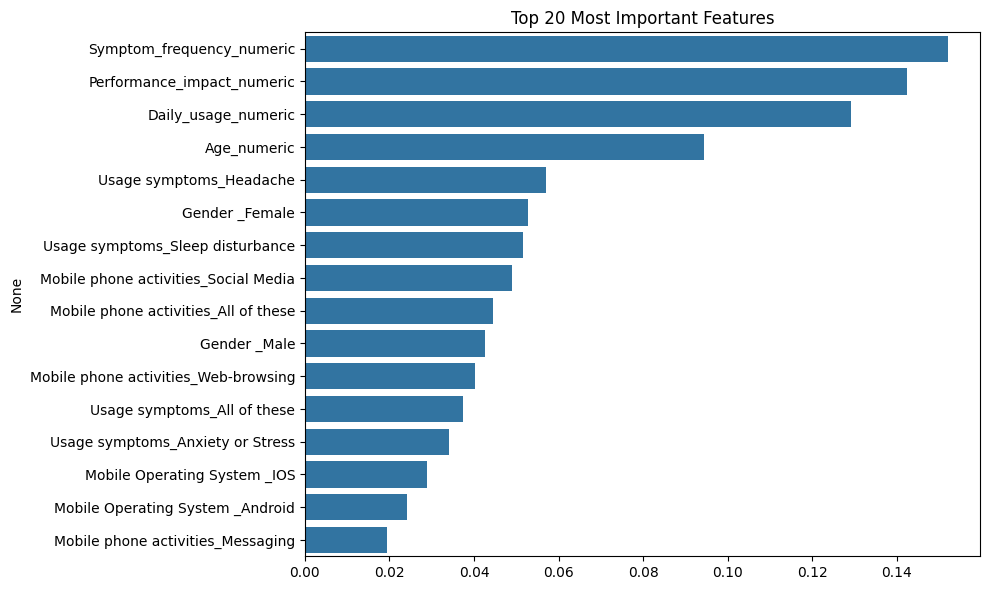

In [36]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.head(20).values, y=importances.head(20).index)
plt.title('Top 20 Most Important Features')
plt.tight_layout()
plt.show()

Feature Importance đối với toàn bộ giá trị của target variables (Các loại Health rating khác nhau)

In [48]:
X = df[feature_columns]
y = df[target_columns]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (100, 16)
Target shape: (100, 4)


In [49]:
# Feature Importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y.idxmax(axis=1))
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nTop 10 features by Random Forest Importance:")
importances.head(10)


Top 10 features by Random Forest Importance:


Performance_impact_numeric              0.164558
Symptom_frequency_numeric               0.148684
Daily_usage_numeric                     0.143181
Age_numeric                             0.101838
Usage symptoms_Headache                 0.053657
Mobile phone activities_Social Media    0.051799
Mobile phone activities_All of these    0.045049
Usage symptoms_Sleep disturbance        0.043757
Usage symptoms_All of these             0.043673
Usage symptoms_Anxiety or Stress        0.042096
dtype: float64

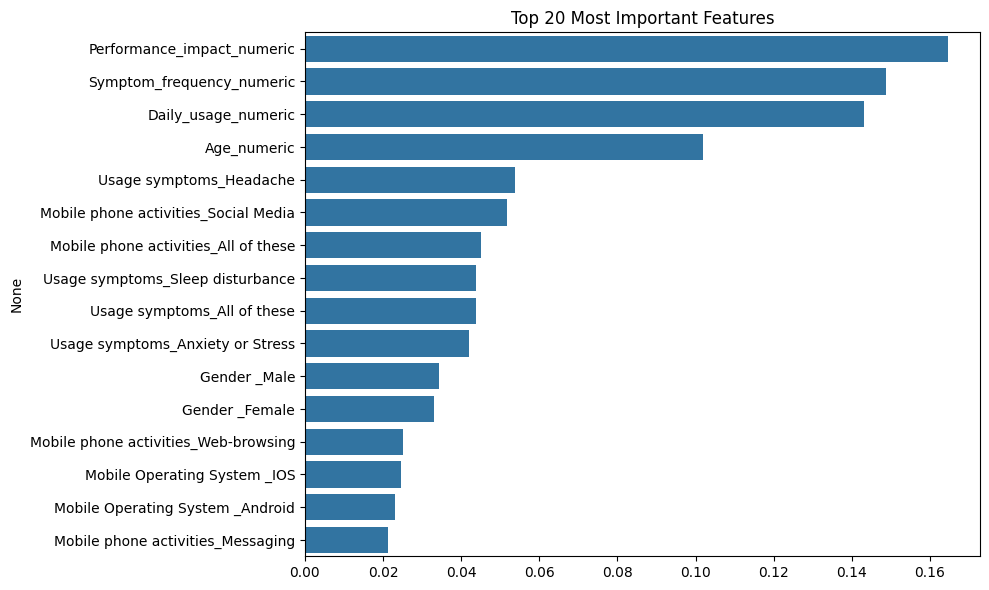

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.head(20).values, y=importances.head(20).index)
plt.title('Top 20 Most Important Features')
plt.tight_layout()
plt.show()

**Chọn lựa thuộc tính** \
Phân tích kết quả của bước feature selection, các features xuất hiện nhiều trong 3 metrics trên: \
1. Symptom_frequency_numeric: Được đánh giá cao trong nhiều metrics (Correlation, Mutual Information, và Random Forest Importance).
2. Performance_impact_numeric: Quan trọng ở cả Random Forest Importance và Correlation.
3. Gender (Female and Male): Xuất hiện ở Correlation and Random Forest Importance.
4. Daily_usage_numeric: Quan trọng trong Random Forest Importance và Mutual Information.
5. Usage symptoms (Headache, Sleep disturbance): Xuất hiện trong nhiều metric.
6. Mobile phone activities (All of these, Social Media): Xuất hiện trong Correlation và Random Forest Importance.
7. Age: Quan trọng khi xét Random Forest Importance đối với tất cả giá trị của target variables.


In [51]:
important_features = [
    "Symptom_frequency_numeric",
    "Performance_impact_numeric",
    "Gender _Female",
    "Gender _Male",
    "Daily_usage_numeric",
    "Usage symptoms_Headache",
    "Usage symptoms_Sleep disturbance",
    "Mobile phone activities_All of these",
    "Mobile phone activities_Social Media",
    "Age_numeric"
]
X = df[important_features]
# y = target['Health_rating_max']

In [52]:
print("Selected features:")
print(important_features)

Selected features:
['Symptom_frequency_numeric', 'Performance_impact_numeric', 'Gender _Female', 'Gender _Male', 'Daily_usage_numeric', 'Usage symptoms_Headache', 'Usage symptoms_Sleep disturbance', 'Mobile phone activities_All of these', 'Mobile phone activities_Social Media', 'Age_numeric']


In [53]:
print("\nFirst few rows of selected features:")
X.head()


First few rows of selected features:


,Symptom_frequency_numeric,Performance_impact_numeric,Gender _Female,Gender _Male,Daily_usage_numeric,Usage symptoms_Headache,Usage symptoms_Sleep disturbance,Mobile phone activities_All of these,Mobile phone activities_Social Media,Age_numeric
0,-1.756819,0.552744,0.0,1.0,0.181818,1,0,0,1,-0.045798
1,0.524764,-0.353394,0.0,1.0,0.181818,0,0,0,1,-0.045798
2,0.524764,1.458882,0.0,1.0,0.181818,0,0,1,0,-0.045798
3,-1.756819,1.458882,0.0,1.0,-0.954545,0,0,1,0,-0.045798
4,0.524764,0.552744,0.0,1.0,1.318182,0,1,1,0,-0.045798


In [54]:
print("\nBasic statistics of selected features:")
X.describe()


Basic statistics of selected features:


,Symptom_frequency_numeric,Performance_impact_numeric,Gender _Female,Gender _Male,Daily_usage_numeric,Usage symptoms_Headache,Usage symptoms_Sleep disturbance,Mobile phone activities_All of these,Mobile phone activities_Social Media,Age_numeric
count,1.000000e+02,1.000000e+02,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,-4.773959e-17,-1.226796e-16,0.190000,0.810000,1.587619e-16,0.240000,0.310000,0.690000,0.320000,3.237688e-16
std,1.005038e+00,1.005038e+00,0.394277,0.394277,1.005038e+00,0.429235,0.464823,0.464823,0.468826,1.005038e+00
min,-1.756819e+00,-2.165669e+00,0.000000,0.000000,-2.090909e+00,0.000000,0.000000,0.000000,0.000000,-1.572382e+00
25%,-6.160275e-01,-3.533937e-01,0.000000,1.000000,-9.545455e-01,0.000000,0.000000,0.000000,0.000000,-4.579752e-02
50%,5.247641e-01,5.527440e-01,0.000000,1.000000,1.818182e-01,0.000000,0.000000,1.000000,0.000000,-4.579752e-02
75%,5.247641e-01,5.527440e-01,0.000000,1.000000,4.659091e-01,0.000000,1.000000,1.000000,1.000000,-4.579752e-02
max,1.665556e+00,1.458882e+00,1.000000,1.000000,1.318182e+00,1.000000,1.000000,1.000000,1.000000,3.007371e+00


In [58]:
y.head()

,Health rating_Poor,Health rating_Good,Health rating_Fair,Health rating_Excellent
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


# Lựa chọn mô hình và huấn luyện

Ta sẽ sử dụng một số mô hình học máy cơ bản, phù hợp với bài toán (multi-label classification).

In [59]:
models = {
    'Logistic Regression': MultiOutputClassifier(LogisticRegression(random_state=42)),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [61]:
# Jaccard score
def jaccard_score_multilabel(y_true, y_pred):
    return jaccard_score(y_true, y_pred, average='samples')

# Perform cross-validation
for name, model in models.items():
    # Use cross_val_predict to get predictions
    y_pred = cross_val_predict(model, X, y, cv=5)

    # Compute Jaccard score
    score = jaccard_score_multilabel(y, y_pred)

    print(f"{name} - Mean Jaccard score: {score:.4f}")

Logistic Regression - Mean Jaccard score: 0.3700
Random Forest - Mean Jaccard score: 0.4100


In [71]:
# F1 score
def f1_score_multilabel(y_true, y_pred):
    return f1_score(y_true, y_pred, average='samples')

# Perform cross-validation
for name, model in models.items():
    # Use cross_val_predict to get predictions
    y_pred = cross_val_predict(model, X, y, cv=5)

    # Compute F1 score
    score = f1_score_multilabel(y, y_pred)

    print(f"{name} - Mean F1 score: {score:.4f}")

Logistic Regression - Mean F1 score: 0.3900
Random Forest - Mean F1 score: 0.4233


Do Random Forest thể hiện tốt hơn, ta sẽ thực hiện Hyperparameter tuning trên model này

In [67]:
print(y.idxmax(axis=1).value_counts())

Health rating_Good         50
Health rating_Excellent    34
Health rating_Fair         13
Health rating_Poor          3
Name: count, dtype: int64


In [69]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# To keep class distribution
cv = StratifiedKFold(n_splits=5)
scorer = make_scorer(f1_score, average='weighted')

# Perform GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring=scorer, n_jobs=-1)
grid_search.fit(X, y.idxmax(axis=1)) # Maximum health rating

# Output the best parameters and best score
print("Best parameters for Random Forest:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

# Use the best model
best_rf = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for Random Forest: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best F1 score: 0.5267608695652173


Thử nghiệm với XGBoost

In [70]:
xgb = MultiOutputClassifier(XGBClassifier(random_state=42))
xgb_pred = cross_val_predict(xgb, X, y, cv=5)
xgb_score = jaccard_score_multilabel(y, xgb_pred)
print("XGBoost - Mean Jaccard score:", xgb_score)

XGBoost - Mean Jaccard score: 0.425


In [72]:
xgb = MultiOutputClassifier(XGBClassifier(random_state=42))
xgb_pred = cross_val_predict(xgb, X, y, cv=5)
xgb_score = f1_score_multilabel(y, xgb_pred)
print("XGBoost - Mean F1 score:", xgb_score)

XGBoost - Mean F1 score: 0.44999999999999996


Ensemble method

In [90]:
voting_clf = MultiOutputClassifier(
    VotingClassifier(
        estimators=[
            ('rf', best_rf),
            ('lr', LogisticRegression(random_state=42)),
            ('xgb', XGBClassifier(random_state=42))
        ],
        voting='hard'
    )
)

# F1 score for multi-label classification
def f1_score_multilabel(y_true, y_pred):
    return f1_score(y_true, y_pred, average='samples')

voting_pred = cross_val_predict(voting_clf, X, y, cv=5)

# Compute F1 score
voting_score = f1_score_multilabel(y, voting_pred)
print("Voting Classifier - Mean F1 score:", voting_score)

Voting Classifier - Mean F1 score: 0.4266666666666667


# Inference


In [95]:
best_rf.predict

<bound method ForestClassifier.predict of RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=300,
                       random_state=42)>

In [110]:
X.columns

Index(['Symptom_frequency_numeric', 'Performance_impact_numeric',
       'Gender _Female', 'Gender _Male', 'Daily_usage_numeric',
       'Usage symptoms_Headache', 'Usage symptoms_Sleep disturbance',
       'Mobile phone activities_All of these',
       'Mobile phone activities_Social Media', 'Age_numeric'],
      dtype='object')

Ta đã lọc output của model là giá trị health rating lớn nhất

In [147]:
def predict_health_rating(df, model=best_rf):
  name = df['Names']
  real_rating = df['Health rating']
  df = df[X.columns]
  for _, output in enumerate(model.predict(df)):
    print(f"Student name: {name.iloc[_]}")
    print(f"Model output: {output.split('_')[1]}")
    print(f"Real rating: {real_rating.iloc[_]}\n\n")
    break

In [148]:
predict_health_rating(df)

Student name: Ali
Model output: Excellent
Real rating: Excellent


